In [31]:
from pathlib import Path
import pandas as pd
import numpy as np

interim = Path('../data/interim')
processed = Path('../data/processed')
events = pd.read_pickle(Path(interim) / 'events.pkl')
game_logs = pd.read_pickle(Path(interim) / 'game_logs.pkl')
panel = pd.read_pickle(Path(interim) / 'panel.pkl')
hits = pd.read_pickle(Path(interim) / 'hits.pkl')
rosters = pd.read_pickle(Path(interim) / 'rosters.pkl')
directory = pd.read_pickle(Path(interim) / 'directory.pkl')

In [33]:
test = pd.merge(events, game_logs, on=['GAME_ID'], indicator=True, how='outer', validate='m:1')

KeyboardInterrupt: 

In [ ]:
test[test._merge == 'right_only']

In [ ]:
test._merge.value_counts()

In [275]:
panel2 = panel.join(directory, on=['BAT_ID'])
panel3 = panel2.join(hits['H_FL'], on=['GAME_ID', 'BAT_ID'])
panel3.head(50)

,GAME_ID,Date,year,ParkID,VisitorStartingPitcherID,HomeStartingPitcherID,spot,BAT_ID,home,PIT_ID,TEAM_PIT_ID,FirstName,LastName,BattingHand,H_FL
0,OAK200803250,2008-03-25,2008,TOK01,matsd001,blanj001,1,pedrd001,False,blanj001,matsd001,Dustin,Pedroia,R,NaN
1,OAK200803260,2008-03-26,2008,TOK01,lestj001,hardr001,1,pedrd001,False,hardr001,lestj001,Dustin,Pedroia,R,NaN
2,WAS200803300,2008-03-30,2008,WAS11,hudst001,pereo001,1,johnk003,False,pereo001,hudst001,Kelly,Johnson,L,NaN
3,ATL200803310,2008-03-31,2008,ATL02,sneli001,glavt001,1,mclon001,False,glavt001,sneli001,Nate,McLouth,L,NaN
4,CHN200803310,2008-03-31,2008,CHI11,sheeb001,zambc001,1,weekr001,False,zambc001,sheeb001,Rickie,Weeks,R,NaN
5,CIN200803310,2008-03-31,2008,CIN09,webbb001,haraa001,1,younc004,False,haraa001,webbb001,Chris,Young,R,NaN
6,FLO200803310,2008-03-31,2008,MIA01,santj003,hendm001,1,reyej001,False,hendm001,santj003,Jose,Reyes,B,NaN
7,LAN200803310,2008-03-31,2008,LOS03,zitob001,pennb002,1,robed001,False,pennb002,zitob001,Dave,Roberts,L,NaN
8,PHI200803310,2008-03-31,2008,PHI13,chicm001,myerb001,1,guzmc001,False,myerb001,chicm001,Cristian,Guzman,B,NaN
9,SDN200803310,2008-03-31,2008,SAN02,oswar001,peavj001,1,bourm001,False,peavj001,oswar001,Michael,Bourn,L,NaN


In [256]:
base = game_logs[['GAME_ID', 'HomeTeam', 'VisitingTeam', 'ParkID', 'HomeH', 'VisitorH']]
base['year'] = base['GAME_ID'].str.slice(3, 7).astype('int')

/Users/rsfletch/opt/anaconda3/envs/bts/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [257]:
base

,GAME_ID,HomeTeam,VisitingTeam,ParkID,HomeH,VisitorH,year
0,OAK200803250,OAK,BOS,TOK01,7.0,11.0,2008
1,OAK200803260,OAK,BOS,TOK01,9.0,5.0,2008
2,WAS200803300,WAS,ATL,WAS11,4.0,5.0,2008
3,ATL200803310,ATL,PIT,ATL02,12.0,17.0,2008
4,CHN200803310,CHN,MIL,CHI11,5.0,7.0,2008
...,...,...,...,...,...,...,...
221485,PIT200510020,PIT,MIL,PIT08,9.0,9.0,2005
221486,SDN200510020,SDN,LAN,SAN02,9.0,4.0,2005
221487,SFN200510020,SFN,ARI,SFO03,9.0,6.0,2005
221488,SLN200510020,SLN,CIN,STL09,16.0,10.0,2005


In [95]:
Home = base.groupby(['HomeTeam', 'year', 'ParkID']).agg({'HomeH':'sum', 'VisitorH':'sum', 'GAME_ID':'nunique'})
Home.columns = ['home_hs', 'home_ha', 'home_g']
Home['home_factor'] = (Home['home_hs'] + Home['home_ha']) / Home['home_g']
Home = Home.rename_axis(['team', 'year', 'ParkID'])

In [96]:
Road = base.groupby(['VisitingTeam', 'year']).agg({'HomeH':'sum', 'VisitorH':'sum', 'GAME_ID':'nunique'})
Road.columns = ['road_ha', 'road_hs', 'road_g']
Road['road_factor'] = (Road['road_hs'] + Road['road_ha']) / Road['road_g']
Road = Road.rename_axis(['team', 'year'])

In [168]:
park_factors = pd.merge(Home, Road, left_index=True, right_index=True)
park_factors['factor'] = park_factors['home_factor'] / park_factors['road_factor']
park_factors = park_factors.reset_index().set_index(['ParkID', 'year'])
park_factors = park_factors.sort_values(['ParkID', 'year'])
park_factors['lag_factor'] = park_factors.groupby('ParkID')['factor'].shift(1)
park_factors['games'] = park_factors['home_g'] + park_factors['road_g']
park_factors['lag_games'] = park_factors.groupby('ParkID')['games'].shift(1)
park_factors.loc[(park_factors['games'] <100), 'factor'] = np.NaN
park_factors
# park_factors.loc['MIN04']

team  home_hs  home_ha  home_g  home_factor  road_ha  road_hs  \
ParkID year                                                                 
ALB01  1880  TRN      0.0      0.0       1     0.000000      0.0      0.0   
       1881  TRN      0.0      0.0       2     0.000000      0.0      0.0   
       1882  TRN      0.0      0.0       4     0.000000      0.0      0.0   
ALT01  1884  ALT      0.0      0.0      18     0.000000      0.0      0.0   
ANA01  1966  CAL    624.0    690.0      81    16.222222    674.0    620.0   
...          ...      ...      ...     ...          ...      ...      ...   
WOR01  1880  WOR      0.0      0.0      42     0.000000      0.0      0.0   
       1881  WOR      0.0      0.0      42     0.000000      0.0      0.0   
       1882  WOR      0.0      0.0      42     0.000000      0.0      0.0   
WOR02  1887  WS8      0.0      0.0       1     0.000000      0.0      0.0   
WOR03  1874  BS1     15.0     19.0       1    34.000000    382.0    452.0   

             road_g  road_factor    factor  lag_factor  games  lag_games  
ParkID year                                                               
ALB01  1880      42     0.000000       NaN         NaN     43        NaN  
       1881      42     0.000000       NaN         NaN     44       43.0  
       1882      43     0.000000       NaN         NaN     47       44.0  
ALT01  1884       7     0.000000       NaN         NaN     25        NaN  
ANA01  1966      81    15.975309  1.015456         NaN    162        NaN  
...             ...          ...       ...         ...    ...        ...  
WOR01  1880      43     0.000000       NaN         NaN     85        NaN  
       1881      41     0.000000       NaN         NaN     83       85.0  
       1882      42     0.000000       NaN         NaN     84       83.0  
WOR02  1887      63     0.000000       NaN         NaN     64        NaN  
WOR03  1874      36    23.166667       NaN         NaN     37        NaN  

[3160 rows x 13 columns]

<AxesSubplot:>

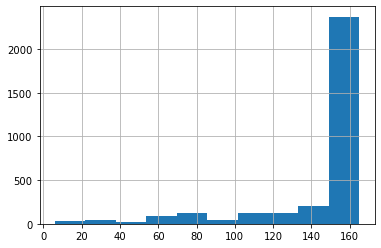

In [169]:
park_factors.games.hist()

In [170]:
import statsmodels.formula.api as sm

In [171]:
limit = (park_factors['games'] >100) & (park_factors['lag_games'] >100)
result = sm.ols(formula="factor ~ lag_factor", data=park_factors[limit]).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 factor   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     913.8
Date:                Tue, 09 Mar 2021   Prob (F-statistic):          9.25e-171
Time:                        13:36:04   Log-Likelihood:                 3302.2
No. Observations:                2440   AIC:                            -6600.
Df Residuals:                    2438   BIC:                            -6589.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4763      0.017     27.329      0.0

<AxesSubplot:xlabel='lag_factor', ylabel='factor'>

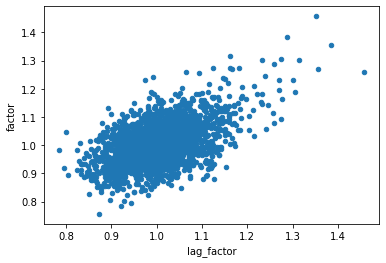

In [172]:
park_factors[limit].plot.scatter(x='lag_factor', y='factor')

<AxesSubplot:>

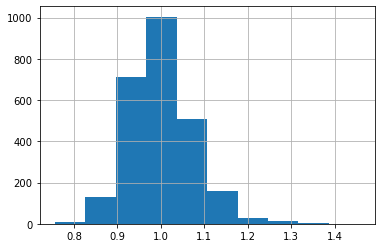

In [173]:
park_factors.loc[(park_factors['games'] >100), 'factor'].hist()

In [174]:
Home = base.groupby(['HomeTeam', 'year', 'ParkID']).agg({'HomeH':'sum', 'VisitorH':'sum', 'GAME_ID':'nunique'})
Home.columns = ['home_hs', 'home_ha', 'home_g']
Home['home_factor'] = (Home['home_hs'] + Home['home_ha']) / Home['home_g']
Home = Home.rename_axis(['team', 'year', 'ParkID'])